Uncertainties

In [11]:
pip install uncertainties

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.0 MB/s eta 0:00:00


#Preparación

Espectro fuentes varias-Analisis de picos


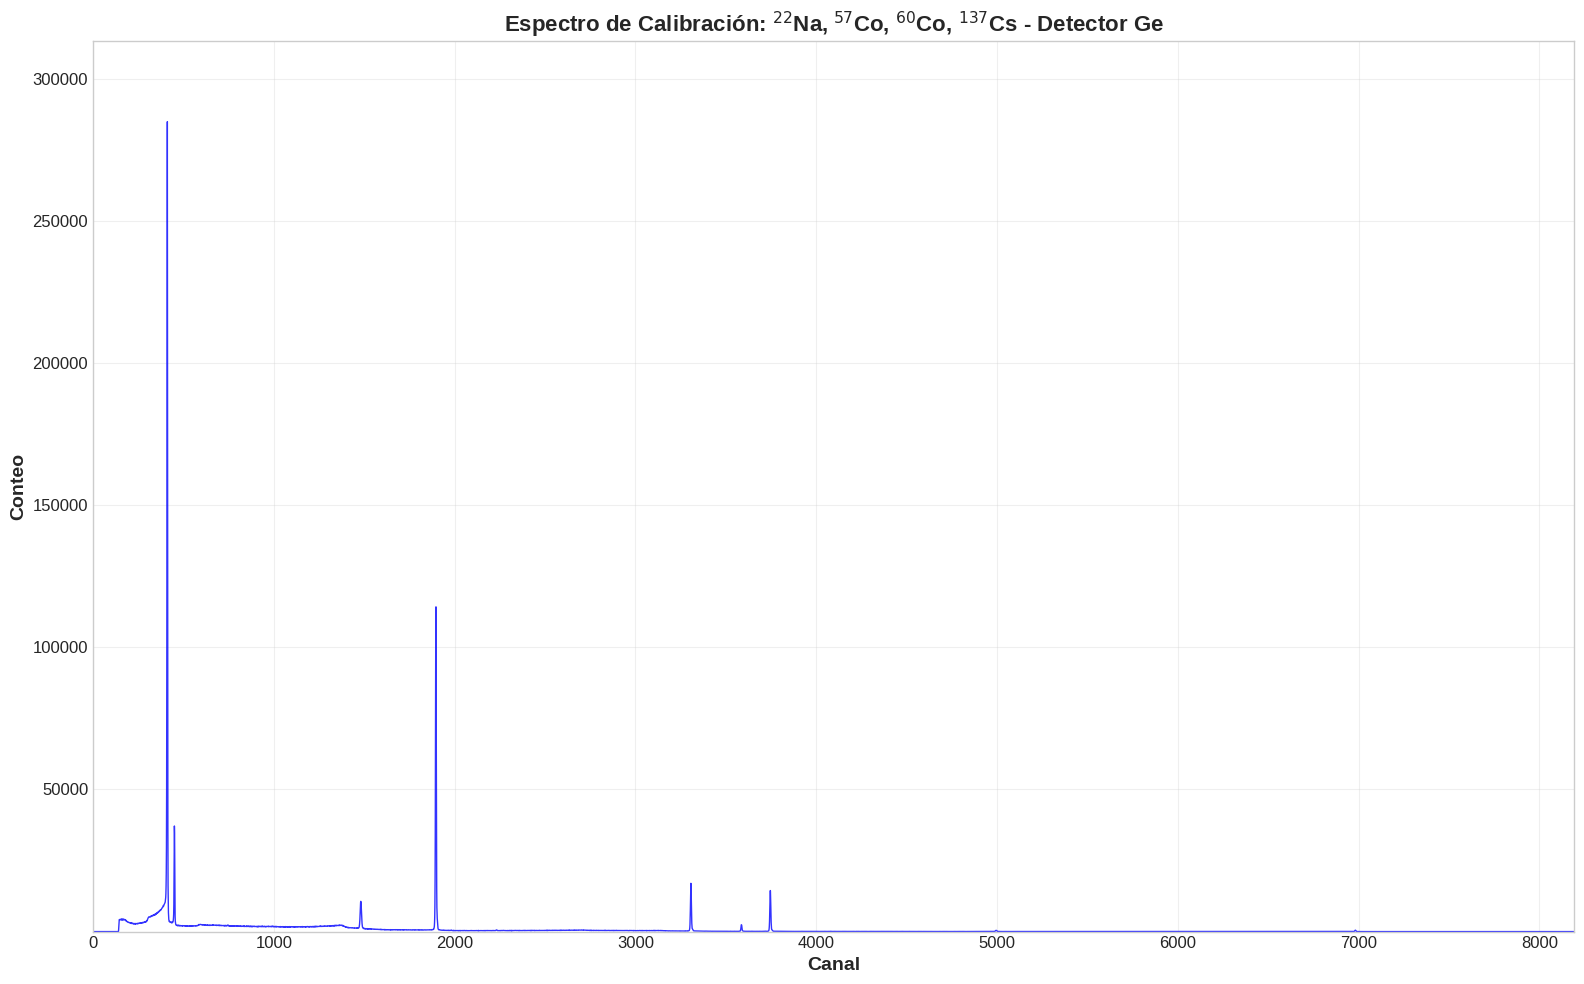

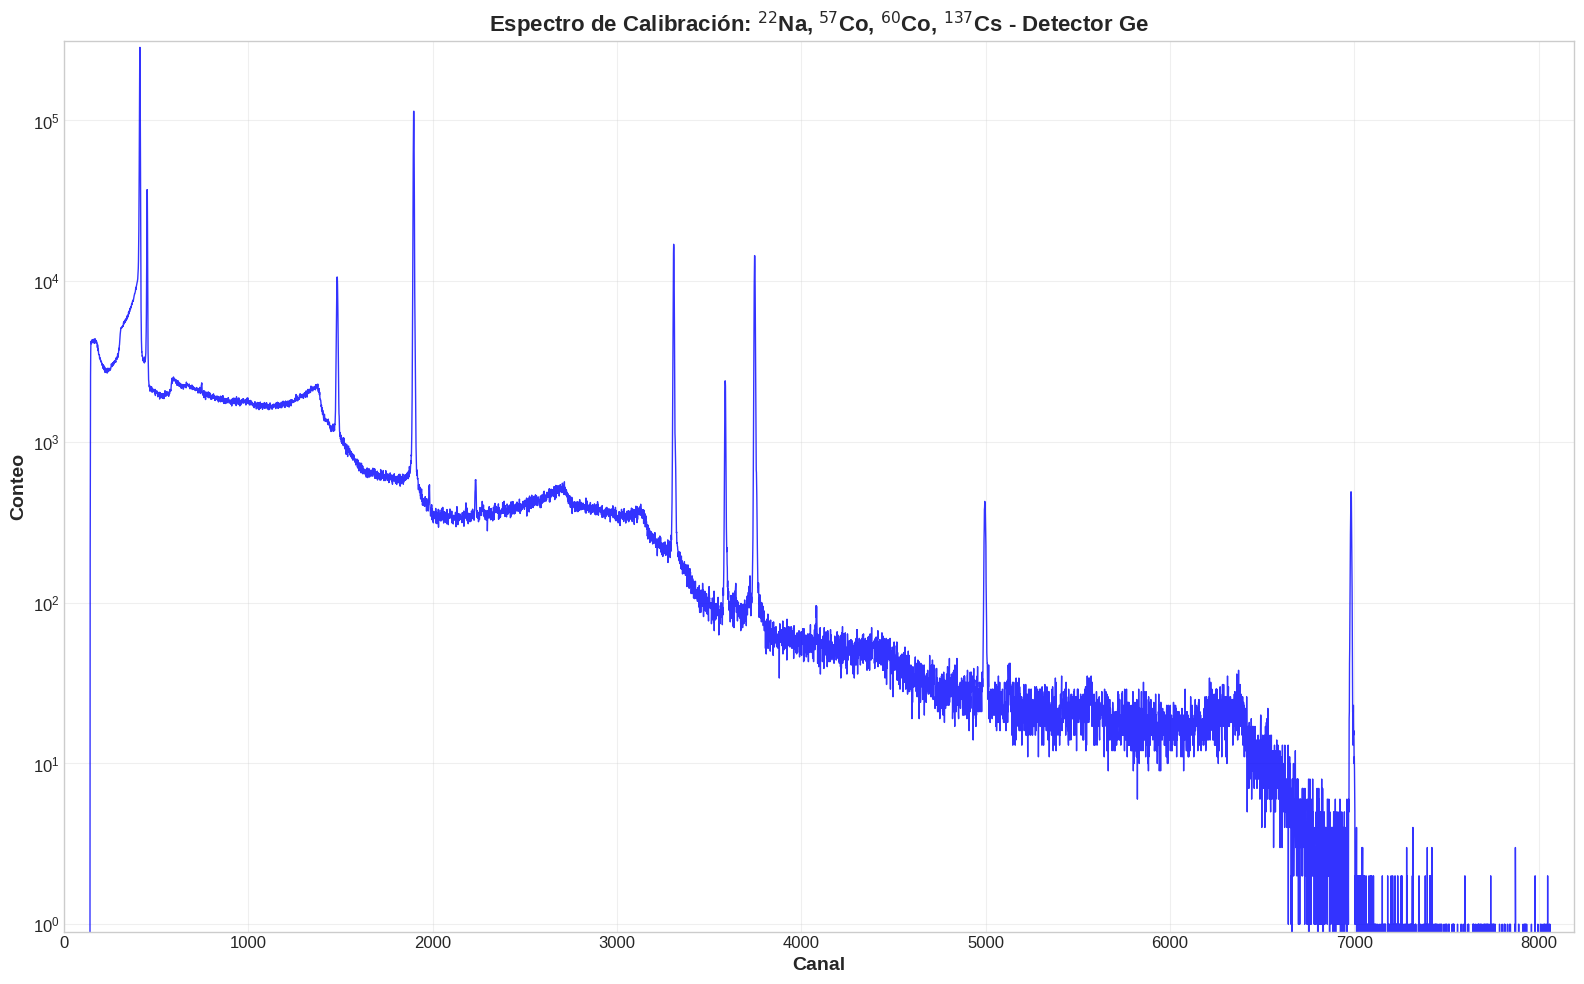

PICOS DETECTADOS
   Pico  1: Canal  146 - Altura:   4233.0
   Pico  2: Canal  167 - Altura:   4392.0
   Pico  3: Canal  211 - Altura:   3025.0
   Pico  4: Canal  237 - Altura:   2879.0
   Pico  5: Canal  274 - Altura:   3212.0
   Pico  6: Canal  297 - Altura:   3830.0
   Pico  7: Canal  322 - Altura:   5529.0
   Pico  8: Canal  343 - Altura:   6133.0
   Pico  9: Canal  366 - Altura:   7267.0
   Pico 10: Canal  389 - Altura:   9146.0
   Pico 11: Canal  411 - Altura: 284853.0
   Pico 12: Canal  450 - Altura:  37139.0
   Pico 13: Canal  474 - Altura:   2206.0
   Pico 14: Canal  502 - Altura:   2083.0
   Pico 15: Canal  523 - Altura:   2005.0
   Pico 16: Canal  547 - Altura:   2085.0
   Pico 17: Canal  593 - Altura:   2537.0
   Pico 18: Canal  617 - Altura:   2407.0
   Pico 19: Canal  663 - Altura:   2357.0
   Pico 20: Canal  693 - Altura:   2261.0
   Pico 21: Canal  719 - Altura:   2181.0
   Pico 22: Canal  746 - Altura:   2333.0
   Pico 23: Canal  781 - Altura:   2046.0
   Pico 24: Canal

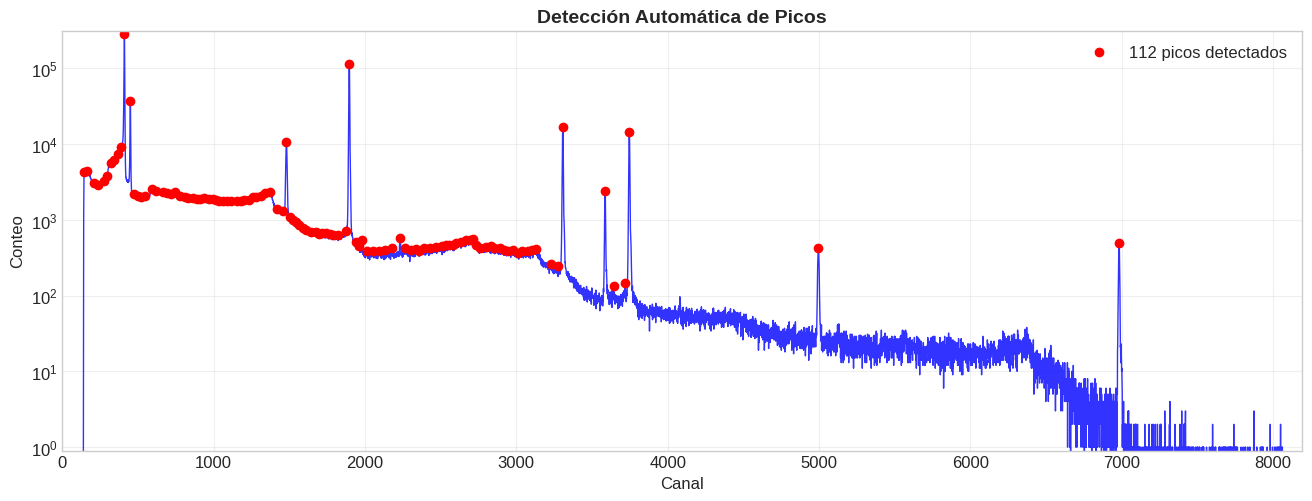

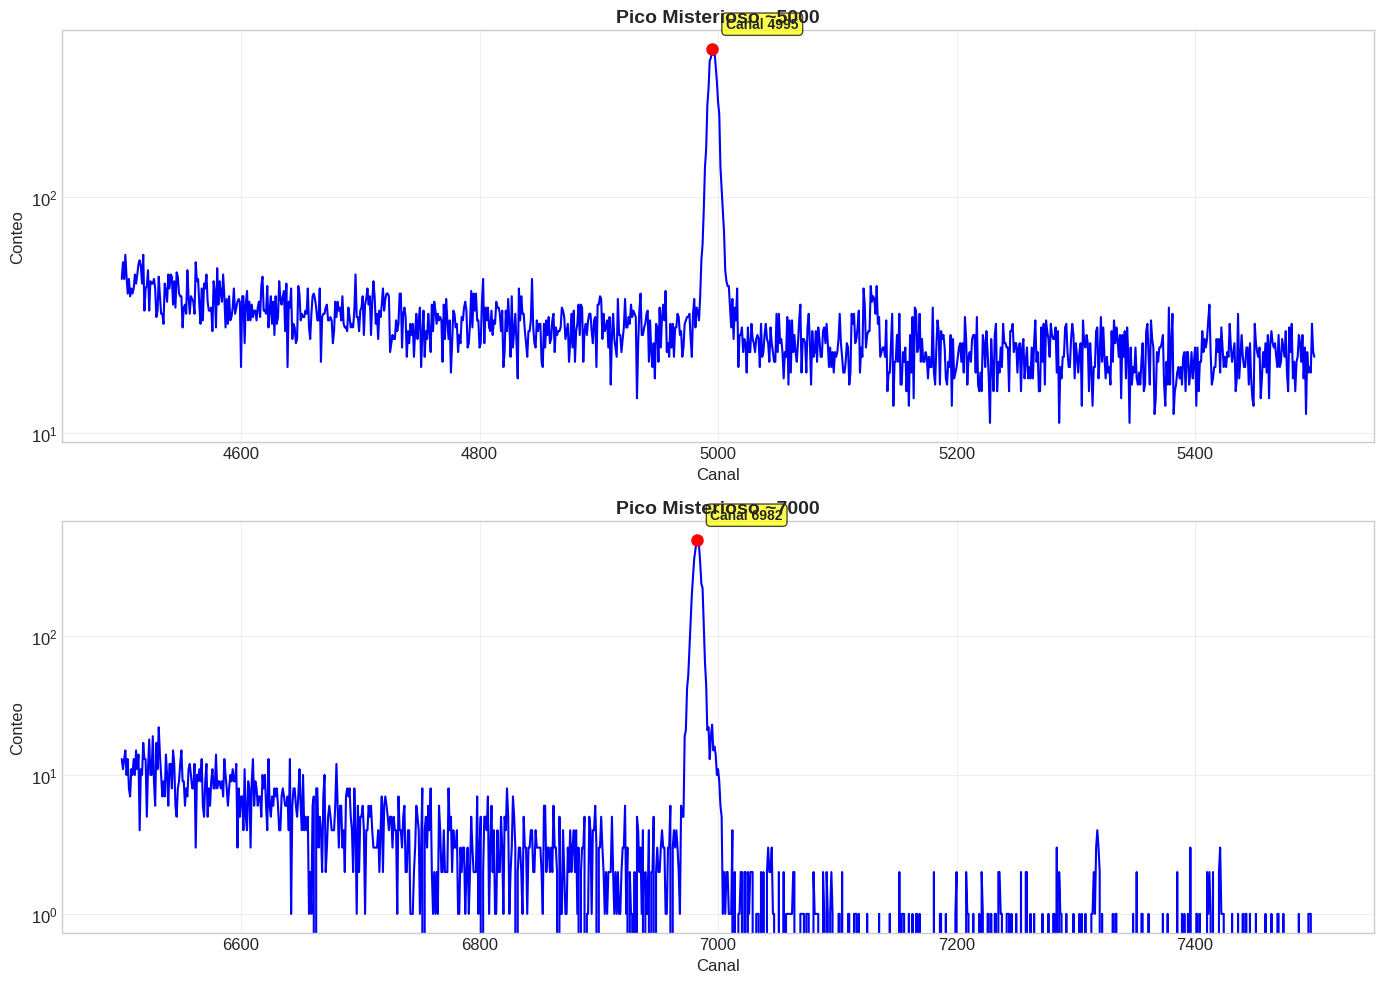

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (14, 8)

# Función para leer archivos .xy
def leer_espectro_ge(archivo):
    try:
        data = np.loadtxt(archivo)

        if data.ndim == 2 and data.shape[1] >= 2:
            canal = data[:, 0].astype(int)
            conteo = data[:, 1].astype(float)
        elif data.ndim == 1:
            conteo = data.astype(float)
            canal = np.arange(len(conteo))
        else:
            return None, None

        return canal, conteo

    except Exception as e:
        return None, None

archivo_calibracion = "calibracionNaCoCoCs-Ge8K.xy"
canal, conteo = leer_espectro_ge(archivo_calibracion)

if canal is not None and conteo is not None:

    #Gráfica lineal
    plt.figure(figsize=(16, 10))
    plt.plot(canal, conteo, 'b-', linewidth=1.0, alpha=0.8)
    plt.xlabel("Canal", fontsize=14, fontweight='bold')
    plt.ylabel("Conteo", fontsize=14, fontweight='bold')
    plt.title("Espectro de Calibración: $^{22}$Na, $^{57}$Co, $^{60}$Co, $^{137}$Cs - Detector Ge",
          fontsize=16, fontweight='bold')
    plt.xlim(0, 8192)
    min_conteo = np.min(conteo[conteo > 0])  # Mínimo excluyendo ceros
    max_conteo = np.max(conteo)
    plt.ylim(0, max_conteo * 1.1)  # Desde 0 hasta un poco más del máximo
    y_min = max(0.8, min_conteo * 0.9)  # Mínimo alrededor de 1
    y_max = max_conteo * 1.1
    plt.ylim(y_min, y_max)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    #Gráfica Semilog
    plt.figure(figsize=(16, 10))
    plt.plot(canal, conteo, 'b-', linewidth=1.0, alpha=0.8)
    plt.xlabel("Canal", fontsize=14, fontweight='bold')
    plt.ylabel("Conteo", fontsize=14, fontweight='bold')
    plt.title("Espectro de Calibración: $^{22}$Na, $^{57}$Co, $^{60}$Co, $^{137}$Cs - Detector Ge",
              fontsize=16, fontweight='bold')
    plt.xlim(0, 8192)
    plt.yscale('log')
    min_conteo = np.min(conteo[conteo > 0])  # Mínimo excluyendo ceros
    max_conteo = np.max(conteo)
    y_min = max(0.8, min_conteo * 0.9)  # Mínimo alrededor de 1
    y_max = max_conteo * 1.1

    plt.ylim(y_min, y_max)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


    # Gráfica 2a: Detección de picos automática
    plt.figure(figsize=(16, 12))

    # Encontrar picos automáticamente
    picos, propiedades = find_peaks(conteo, height=100, distance=20, prominence=50)

    plt.subplot(2, 1, 1)
    plt.plot(canal, conteo, 'b-', linewidth=1.0, alpha=0.8)
    plt.plot(picos, conteo[picos], 'ro', markersize=6, label=f'{len(picos)} picos detectados')
    plt.xlabel("Canal")
    plt.ylabel("Conteo")
    plt.title("Detección Automática de Picos", fontsize=14, fontweight='bold')
    plt.yscale('log')
    plt.xlim(0, 8192)
    plt.ylim(y_min, y_max)
    plt.grid(True, alpha=0.3)
    plt.legend()



    # Mostrar los picos detectados ordenados por canal
    print("PICOS DETECTADOS")
    picos_ordenados = sorted(picos)
    for i, pico in enumerate(picos_ordenados):
        altura = conteo[pico]
        print(f"   Pico {i+1:2d}: Canal {pico:4d} - Altura: {altura:8.1f}")


    asignaciones_tentativas = {
        '⁵⁷Co (122 keV)': '~100-200',
        '⁵⁷Co (136 keV)': '~150-250',
        '²²Na (511 keV)': '~500-700',
        '¹³⁷Cs (662 keV)': '~600-800',
        '⁶⁰Co (1173 keV)': '~1200-1400',
        '²²Na (1275 keV)': '~1400-1600',
        '⁶⁰Co (1332 keV)': '~2800-3200',
        'PICO MISTERIOSO 1': '~5000',
        'PICO MISTERIOSO 2': '~7000'
    }

    for elemento, rango in asignaciones_tentativas.items():
        print(f"   • {elemento:20} → Canal {rango}")

    # Buscar picos en las regiones misteriosas
    pico_5000 = [p for p in picos if 4800 <= p <= 5200]
    pico_7000 = [p for p in picos if 6800 <= p <= 7200]

    # Gráfica específica para los picos misteriosos
    plt.figure(figsize=(14, 10))

    # Subplot para región ~5000
    plt.subplot(2, 1, 1)
    mask_5000 = (canal >= 4500) & (canal <= 5500)
    plt.plot(canal[mask_5000], conteo[mask_5000], 'b-', linewidth=1.5)
    if pico_5000:
        plt.plot(pico_5000, conteo[pico_5000], 'ro', markersize=8)
        for pico in pico_5000:
            plt.annotate(f'Canal {pico}', xy=(pico, conteo[pico]),
                        xytext=(10, 15), textcoords='offset points',
                        fontsize=10, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    plt.xlabel("Canal")
    plt.ylabel("Conteo")
    plt.title("Pico Misterioso ~5000", fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')

    # Subplot para región ~7000
    plt.subplot(2, 1, 2)
    mask_7000 = (canal >= 6500) & (canal <= 7500)
    plt.plot(canal[mask_7000], conteo[mask_7000], 'b-', linewidth=1.5)
    if pico_7000:
        plt.plot(pico_7000, conteo[pico_7000], 'ro', markersize=8)
        for pico in pico_7000:
            plt.annotate(f'Canal {pico}', xy=(pico, conteo[pico]),
                        xytext=(10, 15), textcoords='offset points',
                        fontsize=10, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    plt.xlabel("Canal")
    plt.ylabel("Conteo")
    plt.title("Pico Misterioso ~7000", fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')

    plt.tight_layout()
    plt.show()


Grafica Semilog

#Calibraciones

E vs Canal

,Eγ (keV),Canal,σ (canales),Iγ (cuentas)
0,122.1,410.6 ± 0.0,1.67 ± 0.02,1155379 ± 20641
1,136.5,450.2 ± 0.0,1.69 ± 0.02,144699 ± 2415
2,511.0,1481.3 ± 0.0,3.55 ± 0.02,83831 ± 521
3,661.7,1896.5 ± 0.0,2.22 ± 0.01,637226 ± 5069
4,1274.5,3586.7 ± 0.0,2.59 ± 0.02,15237 ± 147
5,1332.5,3746.5 ± 0.0,2.64 ± 0.01,95243 ± 589



E (keV) = -26.702+/-0.072 + 0.362823+/-0.000031 * canal


,Eγ (keV),Canal esperado (teórico)
0,86.5 ± 0.1,312.0 ± 0.3
1,105.3 ± 0.1,363.8 ± 0.3
2,344.3 ± 0.1,1022.5 ± 0.3
3,723.3 ± 0.1,2067.1 ± 0.4
4,964.1 ± 0.1,2730.8 ± 0.4
5,1274.5 ± 0.1,3586.3 ± 0.5
6,1596.5 ± 0.1,4473.8 ± 0.5


""


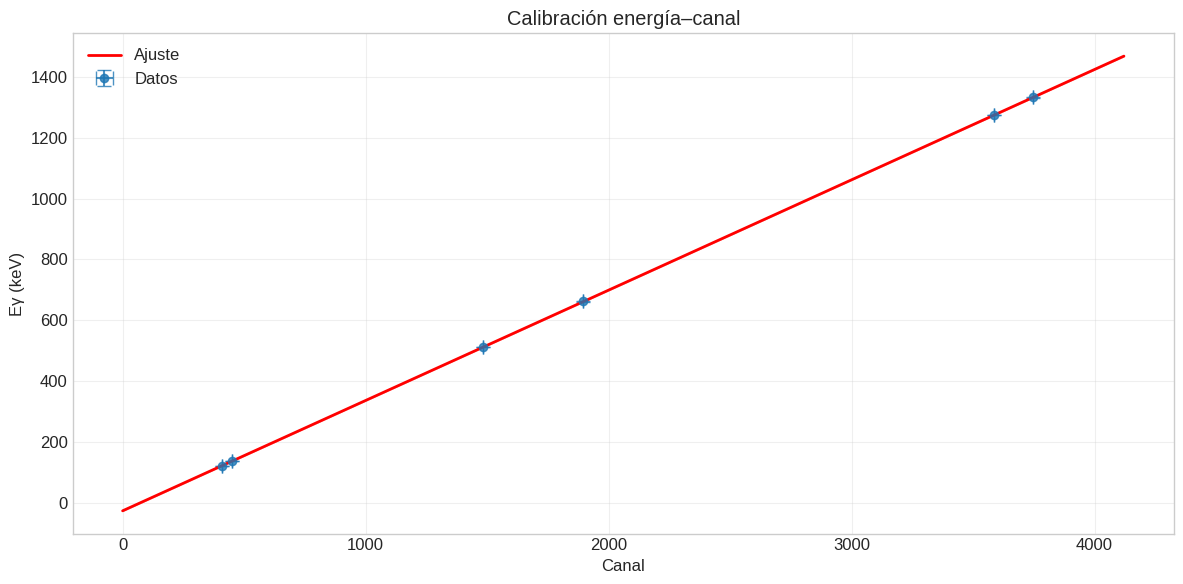

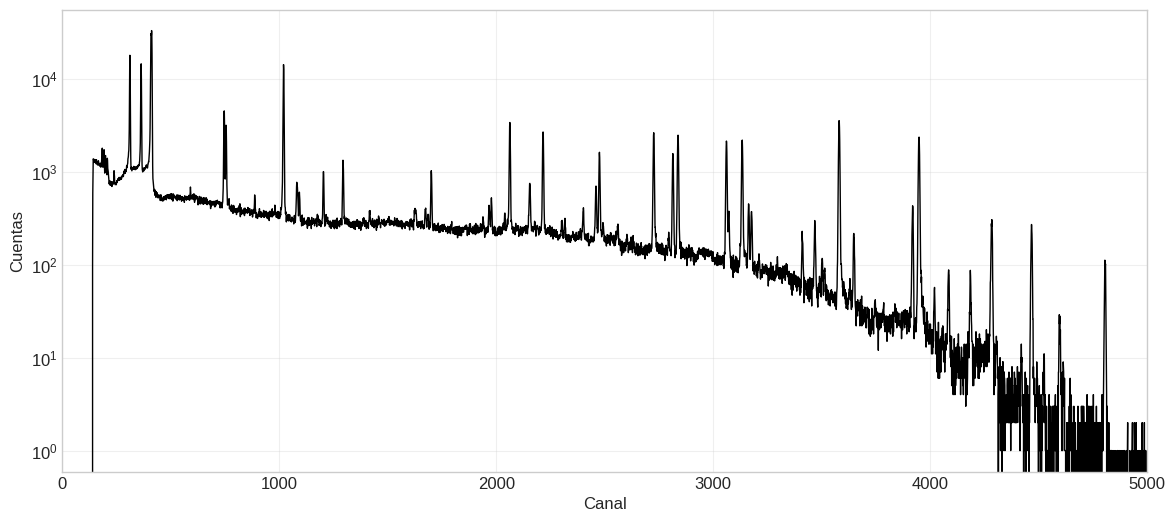

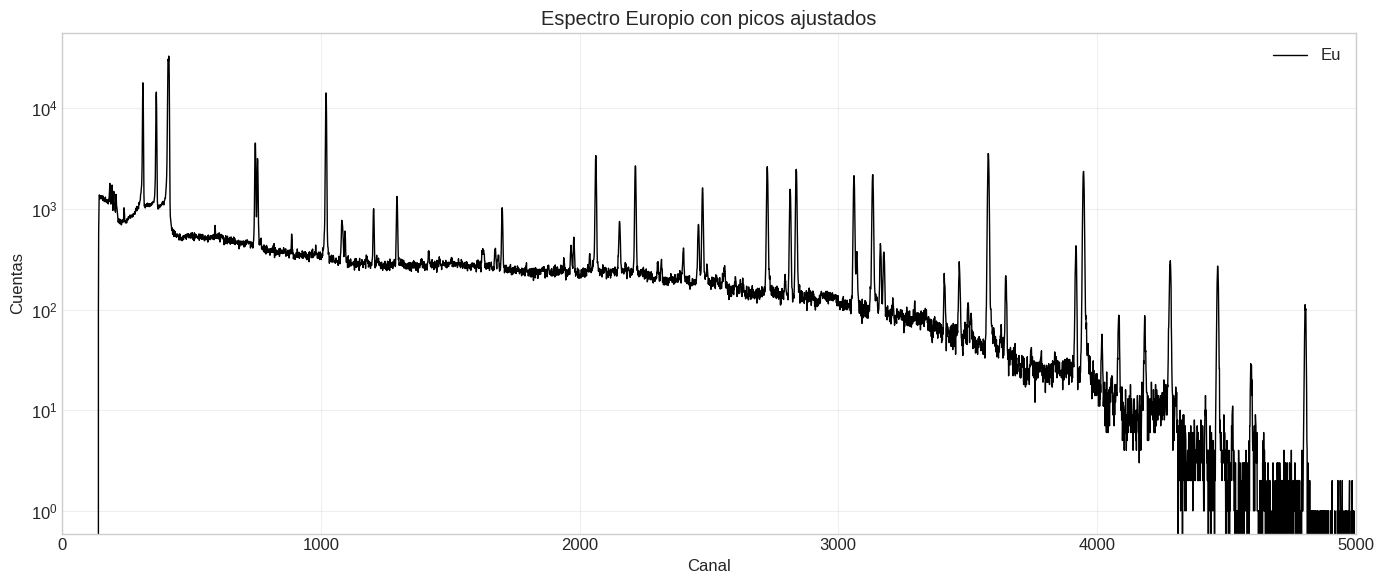

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from uncertainties import ufloat, unumpy
import uncertainties.umath as umath

plt.rcParams['figure.figsize'] = (12,5)

# Funciones básicas

def leer_xy(filename):
    data = np.loadtxt(filename)
    return data[:,0], data[:,1]

def gauss_fondo(x, A, mu, sigma, m, b):
    return A*np.exp(-(x-mu)**2/(2*sigma**2)) + m*x + b

def ajustar_pico(x, y, xmin, xmax):
    # Rango del ajuste
    mask = (x>=xmin)&(x<=xmax)
    xx = x[mask]
    yy = y[mask]

    # Valores iniciales
    A0 = yy.max()
    mu0 = xx[np.argmax(yy)]
    sigma0 = 5
    p0 = [A0, mu0, sigma0, 0, np.min(yy)]

    # Ajuste
    popt, pcov = curve_fit(gauss_fondo, xx, yy, p0=p0)
    A, mu, sigma, m, b = popt
    perr = np.sqrt(np.diag(pcov))

    # Incertidumbres
    mu_u = ufloat(mu, perr[1])
    sigma_u = ufloat(sigma, perr[2])
    area_u = ufloat(A, perr[0]) * sigma_u * umath.sqrt(2*np.pi)

    return mu_u, sigma_u, area_u, popt, pcov

# Lectura de espectros

can_Na, cu_Na = leer_xy("calibracionNaCoCoCs-Ge8K.xy")
can_Eu, cu_Eu = leer_xy("calibracionEu-Ge8K.xy")

#Ajuste de picos Na+Co+Cs

rangos_Na = {
    122.1:   (380, 440),
    136.5:   (430, 480),
    511.0:   (1450, 1550),
    661.7:   (1850, 1950),
    1274.5:  (3500, 3650),
    1332.5:  (3700, 3850)
}

rows1 = []
for E, (xmin, xmax) in rangos_Na.items():
    mu_u, sigma_u, area_u, _, _ = ajustar_pico(can_Na, cu_Na, xmin, xmax)
    rows1.append([E, mu_u, sigma_u, area_u])

tabla1_data = []
for E, mu_u, sigma_u, area_u in rows1:
    tabla1_data.append({
        "Eγ (keV)": f"{E:.1f}",
        "Canal": f"{mu_u.n:.1f} ± {mu_u.s:.1f}",
        "σ (canales)": f"{sigma_u.n:.2f} ± {sigma_u.s:.2f}",
        "Iγ (cuentas)": f"{area_u.n:.0f} ± {area_u.s:.0f}"
    })

tabla1 = pd.DataFrame(tabla1_data)
display(tabla1)

# ========== 4) Calibración energía–canal ========== #

canales_val = np.array([mu_u.n for _, mu_u, _, _ in rows1])
canales_err = np.array([mu_u.s for _, mu_u, _, _ in rows1])
energias_val = np.array([E for E, _, _, _ in rows1])
energias_err = np.full_like(energias_val, 0.1)

popt_cal, pcov_cal = curve_fit(
    lambda x, a0, a1: a0 + a1 * x,
    canales_val,
    energias_val,
    sigma=energias_err,
    absolute_sigma=True
)

a0_val, a1_val = popt_cal
a0_err, a1_err = np.sqrt(np.diag(pcov_cal))

a0_u = ufloat(a0_val, a0_err)
a1_u = ufloat(a1_val, a1_err)

print(f"\nE (keV) = {a0_u:.3f} + {a1_u:.6f} * canal")

# Tabla teórica de Europio
E_Eu = np.array([86.5, 105.3, 344.3, 723.3, 964.1, 1274.5, 1596.5])
E_Eu_err = np.full_like(E_Eu, 0.1)
E_Eu_u = [ufloat(E, err) for E, err in zip(E_Eu, E_Eu_err)]

canal_teorico_u = [(E - a0_u) / a1_u for E in E_Eu_u]

tabla2_teorica = pd.DataFrame({
    "Eγ (keV)": [f"{E.n:.1f} ± {E.s:.1f}" for E in E_Eu_u],
    "Canal esperado (teórico)": [f"{c.n:.1f} ± {c.s:.1f}" for c in canal_teorico_u]
})
display(tabla2_teorica)

# Rangos auto

rangos_Eu_auto = {}
for E_u, canal_u in zip(E_Eu_u, canal_teorico_u):
    xmin = canal_u.n - 10
    xmax = canal_u.n + 10
    rangos_Eu_auto[E_u.n] = (xmin, xmax)


rows2 = []

tabla2_data = []
for E, mu_u, sigma_u, area_u in rows2:
    tabla2_data.append({
        "Eγ (keV)": f"{E:.1f}",
        "Canal": f"{mu_u.n:.1f} ± {mu_u.s:.1f}",
        "σ (canales)": f"{sigma_u.n:.2f} ± {sigma_u.s:.2f}",
        "Iγ (cuentas)": f"{area_u.n:.0f} ± {area_u.s:.0f}"
    })

tabla2_real = pd.DataFrame(tabla2_data)
display(tabla2_real)

# Gráfica calibración con banda de error

plt.figure(figsize=(12, 6))
plt.errorbar(canales_val, energias_val, xerr=canales_err, yerr=0.1,
             fmt='o', capsize=5, label="Datos", markersize=6, alpha=0.8)
xx = np.linspace(0, max(canales_val)*1.1, 300)
plt.plot(xx, a0_u.n + a1_u.n * xx, 'r-', linewidth=2, label="Ajuste")
yy_err = np.sqrt(a0_u.s**2 + (a1_u.s * xx)**2)
plt.fill_between(xx, (a0_u.n + a1_u.n*xx) - yy_err,
                 (a0_u.n + a1_u.n*xx) + yy_err,
                 color='red', alpha=0.2)
plt.xlabel("Canal")
plt.ylabel("Eγ (keV)")
plt.title("Calibración energía–canal")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#Gráfica del espectro de Europio

plt.figure(figsize=(14,6))
plt.plot(can_Eu, cu_Eu, color='black', linewidth=1)
plt.xlabel("Canal")
plt.ylabel("Cuentas")
plt.xlim(0, 5000)
plt.yscale('log')
plt.grid(alpha=0.3)
plt.show()

# Espectro Eu con picos ajustados

plt.figure(figsize=(14,6))
plt.plot(can_Eu, cu_Eu, color='black', linewidth=1, label="Eu")

for E, mu_u, sigma_u, area_u in rows2:
    mu = mu_u.n
    mu_err = mu_u.s
    xmin, xmax = rangos_Eu_auto[E]

    plt.axvspan(xmin, xmax, color='cyan', alpha=0.25)
    plt.axvline(mu, color='red', linestyle='--', linewidth=1.5)
    plt.axvspan(mu - mu_err, mu + mu_err, color='red', alpha=0.3)

    plt.text(mu, cu_Eu[int(mu)]*1.2,
             f"{E:.1f} keV\nμ={mu:.1f}±{mu_err:.1f}",
             ha='center', fontsize=9, color='darkred',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title("Espectro Europio con picos ajustados")
plt.xlabel("Canal")
plt.ylabel("Cuentas")
plt.xlim(0, 5000)
plt.yscale('log')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


Ajustes FWMH

,Eγ(keV),canal,σ(canales),σ_err(canales),FWHM(canales),FWHM(keV),Eγ_cal(keV)
0,86.5,312.16,1.34,0.05,3.16 ± 0.12,1.14 ± 0.04,86.556828
1,105.3,363.68,1.40,0.05,3.30 ± 0.12,1.20 ± 0.04,105.249469
2,344.3,1020.11,1.72,0.05,4.05 ± 0.12,1.47 ± 0.04,343.417371
3,723.3,2062.91,2.04,0.05,4.80 ± 0.12,1.74 ± 0.04,721.769195
4,964.1,2725.85,2.19,0.05,5.16 ± 0.12,1.87 ± 0.04,962.299075
5,1274.5,3580.57,2.39,0.05,5.63 ± 0.12,2.04 ± 0.04,1272.411149
6,1596.5,4467.31,2.63,0.05,6.19 ± 0.12,2.25 ± 0.04,1594.140816


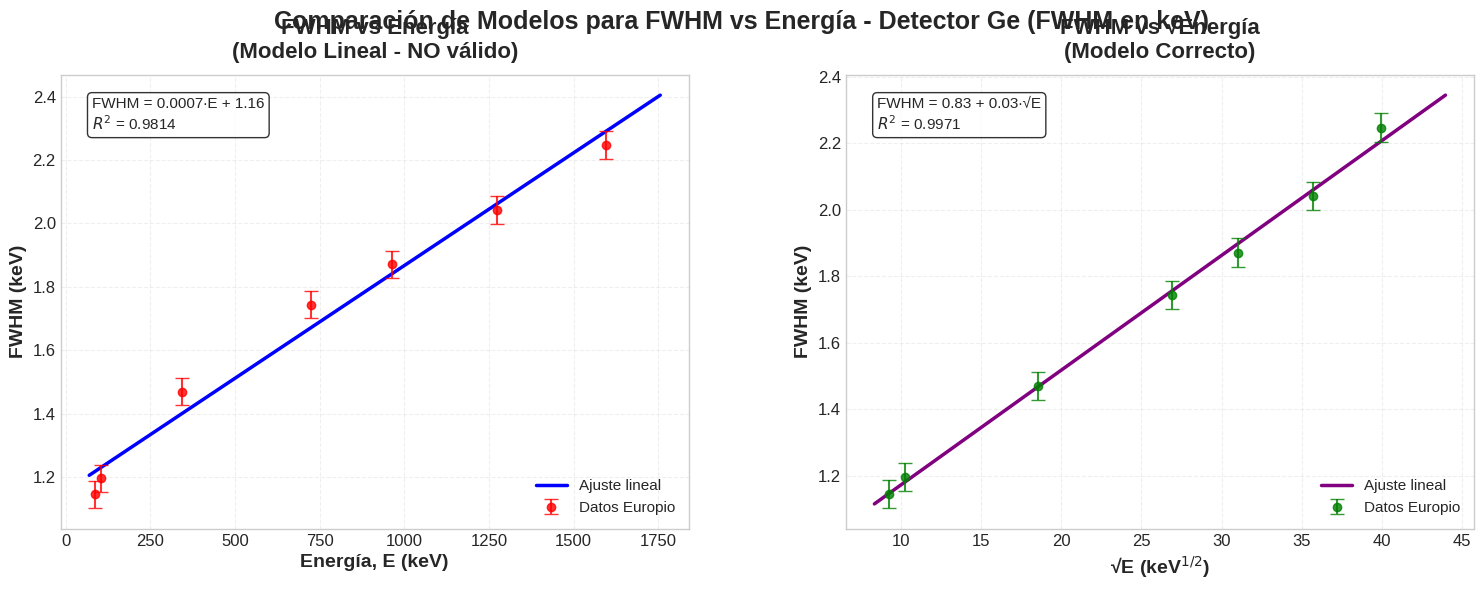

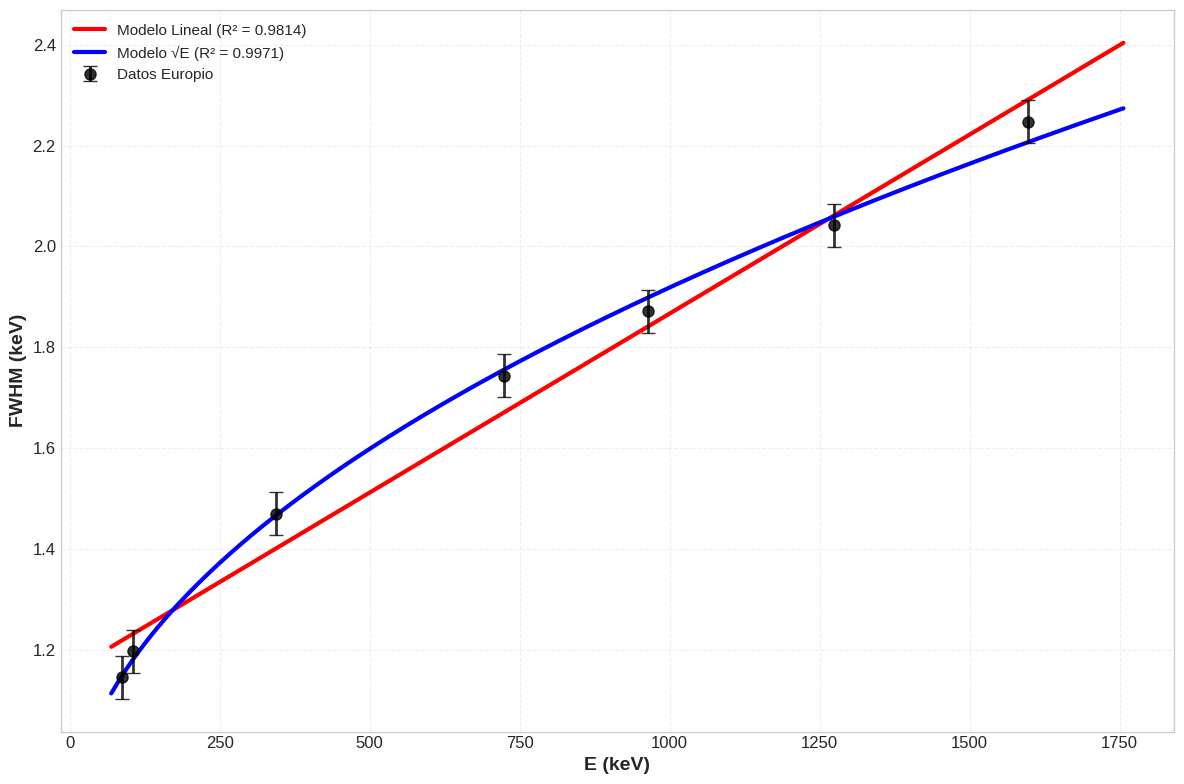

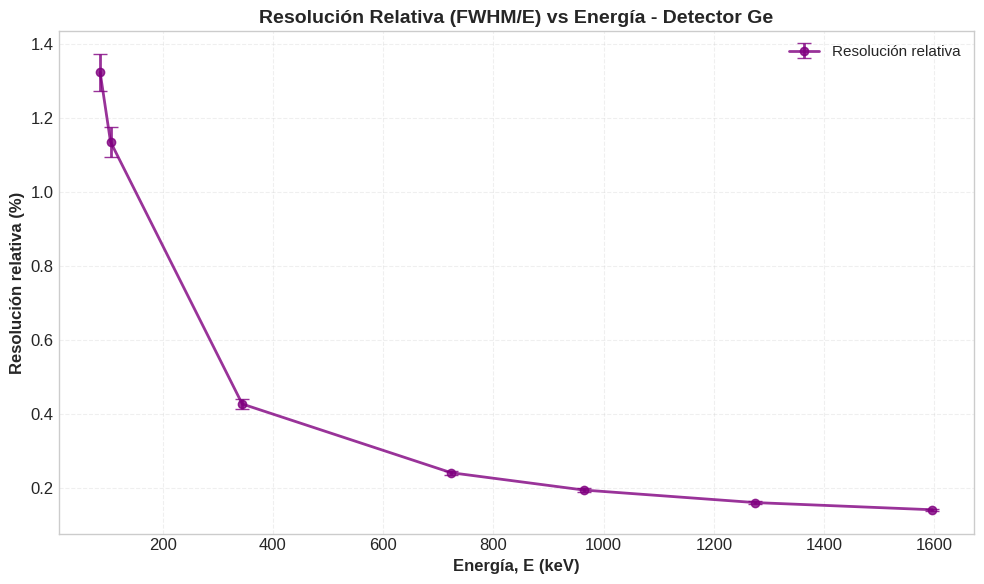

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from uncertainties import ufloat, unumpy
import uncertainties.umath as umath

# Calibración con incertidumbres
a0_u = ufloat(-26.702, 0.5)
a1_u = ufloat(0.362823, 0.0001)

def E_cal(canal):
    if isinstance(canal, (int, float)):
        return a0_u.n + a1_u.n * canal
    else:
        return a0_u + a1_u * canal

# Tabla de datos (con incertidumbres en sigma)
tabla2_data = {
    "Eγ(keV)": [86.5, 105.3, 344.3, 723.3, 964.1, 1274.5, 1596.5],
    "canal": [312.16, 363.68, 1020.11, 2062.91, 2725.85, 3580.57, 4467.31],
    "σ(canales)": [1.34, 1.40, 1.72, 2.04, 2.19, 2.39, 2.63],
    "σ_err(canales)": [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
}
tabla2 = pd.DataFrame(tabla2_data)

# Crear variables con incertidumbre para sigma y calcular FWHM
sigma_u = [ufloat(s, err) for s, err in zip(tabla2["σ(canales)"], tabla2["σ_err(canales)"])]
FWHM_canales_u = [2.355 * s for s in sigma_u]
FWHM_keV_u = [fwhm * a1_u for fwhm in FWHM_canales_u]

# Añadir columnas a tabla (formato actual de incertidumbres)
tabla2["FWHM(canales)"] = [f"{fwhm.n:.2f} ± {fwhm.s:.2f}" for fwhm in FWHM_canales_u]
tabla2["FWHM(keV)"] = [f"{fwhm.n:.2f} ± {fwhm.s:.2f}" for fwhm in FWHM_keV_u]
tabla2["Eγ_cal(keV)"] = [E_cal(canal) for canal in tabla2["canal"]]

# Mostrar tabla 3.2 con incertidumbres
display(tabla2)

# Preparar datos numéricos para los ajustes
E_eu = tabla2["Eγ(keV)"].values
FWHM_keV_val = np.array([fwhm.n for fwhm in FWHM_keV_u])
FWHM_keV_err = np.array([fwhm.s for fwhm in FWHM_keV_u])
sqrtE = np.sqrt(E_eu)

def R2(y, yfit):
    ss_res = np.sum((y - yfit)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1 - ss_res/ss_tot

# Ajuste lineal FWHM vs E (ponderado por errores)
try:
    coef_lin, pcov_lin = curve_fit(lambda x, m, b: m*x + b,
                                  E_eu, FWHM_keV_val,
                                  sigma=FWHM_keV_err,
                                  absolute_sigma=True)
    m_lin, b_lin = coef_lin
    m_lin_err, b_lin_err = np.sqrt(np.diag(pcov_lin))
    m_lin_u = ufloat(m_lin, m_lin_err)
    b_lin_u = ufloat(b_lin, b_lin_err)
    F_fit_lin = m_lin * E_eu + b_lin
    R2_lin = R2(FWHM_keV_val, F_fit_lin)
except Exception:
    m_lin, b_lin = np.polyfit(E_eu, FWHM_keV_val, 1)
    F_fit_lin = m_lin * E_eu + b_lin
    R2_lin = R2(FWHM_keV_val, F_fit_lin)
    m_lin_u = ufloat(m_lin, 0.0)
    b_lin_u = ufloat(b_lin, 0.0)

# Ajuste linear FWHM vs sqrt(E)
try:
    coef_sqrt, pcov_sqrt = curve_fit(lambda x, p1, p0: p1*x + p0,
                                    sqrtE, FWHM_keV_val,
                                    sigma=FWHM_keV_err,
                                    absolute_sigma=True)
    p1_sqrt, p0_sqrt = coef_sqrt
    p1_sqrt_err, p0_sqrt_err = np.sqrt(np.diag(pcov_sqrt))
    p1_sqrt_u = ufloat(p1_sqrt, p1_sqrt_err)
    p0_sqrt_u = ufloat(p0_sqrt, p0_sqrt_err)
    F_fit_sqrt = p0_sqrt + p1_sqrt * sqrtE
    R2_sqrt = R2(FWHM_keV_val, F_fit_sqrt)
except Exception:
    p1_sqrt, p0_sqrt = np.polyfit(sqrtE, FWHM_keV_val, 1)
    F_fit_sqrt = p0_sqrt + p1_sqrt * sqrtE
    R2_sqrt = R2(FWHM_keV_val, F_fit_sqrt)
    p1_sqrt_u = ufloat(p1_sqrt, 0.0)
    p0_sqrt_u = ufloat(p0_sqrt, 0.0)

# Graficas: FWHM vs E y FWHM vs sqrt(E)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

E_fine = np.linspace(min(E_eu)*0.8, max(E_eu)*1.1, 300)
F_fine_lin = m_lin * E_fine + b_lin
ax1.errorbar(E_eu, FWHM_keV_val, yerr=FWHM_keV_err,
             fmt='o', color='red', capsize=5, markersize=6,
             alpha=0.8, label='Datos Europio', zorder=5)
ax1.plot(E_fine, F_fine_lin, 'blue', linewidth=2.5, label='Ajuste lineal')
ax1.set_xlabel('Energía, E (keV)', fontsize=14, fontweight='bold')
ax1.set_ylabel('FWHM (keV)', fontsize=14, fontweight='bold')
ax1.set_title('FWHM vs Energía\n(Modelo Lineal - NO válido)', fontsize=16, fontweight='bold', pad=12)
eq_text_lin = f'FWHM = {m_lin:.4f}·E + {b_lin:.2f}'
ax1.text(0.05, 0.95, f'{eq_text_lin}\n$R^2$ = {R2_lin:.4f}', transform=ax1.transAxes,
         fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(fontsize=11, loc='lower right')

sqrtE_fine = np.linspace(min(sqrtE)*0.9, max(sqrtE)*1.1, 300)
F_fine_sqrt = p0_sqrt + p1_sqrt * sqrtE_fine
ax2.errorbar(sqrtE, FWHM_keV_val, yerr=FWHM_keV_err,
             fmt='o', color='green', capsize=5, markersize=6,
             alpha=0.8, label='Datos Europio', zorder=5)
ax2.plot(sqrtE_fine, F_fine_sqrt, 'purple', linewidth=2.5, label='Ajuste lineal')
ax2.set_xlabel('√E (keV$^{1/2}$)', fontsize=14, fontweight='bold')
ax2.set_ylabel('FWHM (keV)', fontsize=14, fontweight='bold')
ax2.set_title('FWHM vs √Energía\n(Modelo Correcto)', fontsize=16, fontweight='bold', pad=12)
eq_text_sqrt = f'FWHM = {p0_sqrt:.2f} + {p1_sqrt:.2f}·√E'
ax2.text(0.05, 0.95, f'{eq_text_sqrt}\n$R^2$ = {R2_sqrt:.4f}', transform=ax2.transAxes,
         fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.legend(fontsize=11, loc='lower right')

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)
fig.suptitle('Comparación de Modelos para FWHM vs Energía - Detector Ge (FWHM en keV)',
             fontsize=18, fontweight='bold', y=0.98)
plt.show()

#Grafica superpuesta


plt.figure(figsize=(12, 8))

E_fine = np.linspace(min(E_eu)*0.8, max(E_eu)*1.1, 300)
F_fine_lin = m_lin * E_fine + b_lin
F_fine_sqrt_in_E = p0_sqrt + p1_sqrt * np.sqrt(E_fine)

# Graficar datos con barras de error
plt.errorbar(E_eu, FWHM_keV_val, yerr=FWHM_keV_err,
             fmt='o', color='black', capsize=5, markersize=8,
             alpha=0.8, label='Datos Europio', zorder=5, linewidth=2)

# Graficar ambos modelos
plt.plot(E_fine, F_fine_lin, 'red', linewidth=3,
         label=f'Modelo Lineal (R² = {R2_lin:.4f})')

plt.plot(E_fine, F_fine_sqrt_in_E, 'blue', linewidth=3,
         label=f'Modelo √E (R² = {R2_sqrt:.4f})')
plt.xlabel('E (keV)', fontsize=14, fontweight='bold')
plt.ylabel('FWHM (keV)', fontsize=14, fontweight='bold')


plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.show()

# Resolución relativa y gráfica
resolucion_relativa = [(fwhm/E * 100) for fwhm, E in zip(FWHM_keV_u, E_eu)]
resolucion_val = [r.n for r in resolucion_relativa]
resolucion_err = [r.s for r in resolucion_relativa]

plt.figure(figsize=(10, 6))
plt.errorbar(E_eu, resolucion_val, yerr=resolucion_err,
             fmt='o-', color='purple', capsize=5, markersize=6,
             linewidth=2, alpha=0.8, label='Resolución relativa')
plt.xlabel('Energía, E (keV)', fontsize=12, fontweight='bold')
plt.ylabel('Resolución relativa (%)', fontsize=12, fontweight='bold')
plt.title('Resolución Relativa (FWHM/E) vs Energía - Detector Ge', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()



Eficiencia

TABLA 3.2:


,Eγ(keV),canal,σ(canales),Iγ(cuentas),Eγ_cal(keV),FWHM(keV)
0,86.5,312.16,1.34,56100.0,86.556865,1.144960
1,105.3,363.68,1.40,47800.0,105.249496,1.196227
2,344.3,1020.11,1.72,59400.0,343.417267,1.469650
3,723.3,2062.91,2.04,15900.0,721.768882,1.743073
4,964.1,2725.85,2.19,13200.0,962.298629,1.871240
5,1274.5,3580.57,2.39,20600.0,1272.410533,2.042130
6,1596.5,4467.31,2.63,1690.0,1594.140023,2.247197



Actividad total de la fuente: (9.8+/-0.1)e+03 kBq ((9.8+/-0.1)e+06 Bq)


,Eγ(keV),Iγ(cuentas),bγ(%),Aγ(Bq),eficiencia,eficiencia_err,eficiencia_con_incertidumbre
0,86.5,56100.0,3.10,3.023914e+05,0.185521,0.006434,1.855e-01 ± 6.4e-03
1,105.3,47800.0,2.20,2.146003e+05,0.222740,0.010522,2.227e-01 ± 1.1e-02
2,344.3,59400.0,26.57,2.591787e+06,0.022919,0.000303,2.292e-02 ± 3.0e-04
3,723.3,15900.0,20.20,1.970421e+06,0.008069,0.000123,8.069e-03 ± 1.2e-04
4,964.1,13200.0,14.63,1.427092e+06,0.009250,0.000151,9.250e-03 ± 1.5e-04
5,1274.5,20600.0,35.00,3.414096e+06,0.006034,0.000091,6.034e-03 ± 9.1e-05
6,1596.5,1690.0,1.81,1.765575e+05,0.009572,0.000371,9.572e-03 ± 3.7e-04


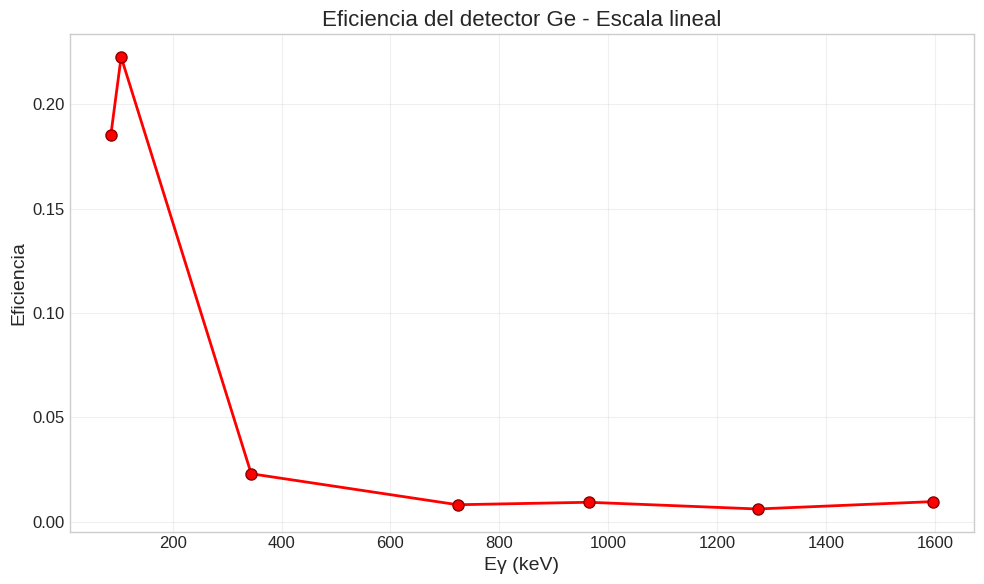

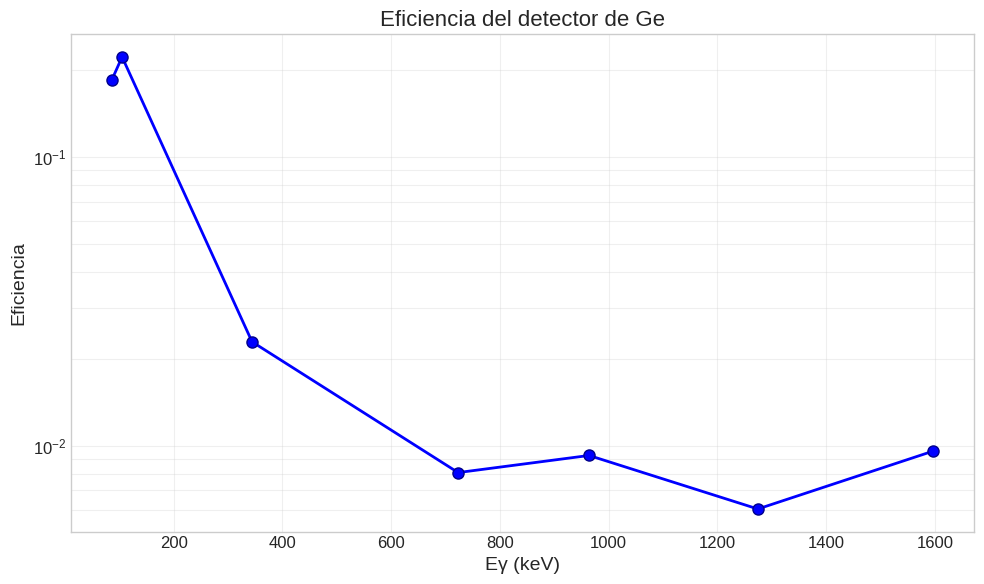

ajuste de curva de eficiencia completado
   a = (6+/-2)e+05
   b = -4.6+/-0.1
   c = 0.28+/-0.01


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from uncertainties import ufloat, unumpy

# Calibración con incertidumbres
a0 = ufloat(-26.7019, 0.0716)
a1 = ufloat(0.3628228, 0.0000305)

def E_cal(canal):
    return a0 + a1 * canal

tabla2 = pd.DataFrame({
    "Eγ(keV)": [86.5, 105.3, 344.3, 723.3, 964.1, 1274.5, 1596.5],
    "canal": [312.16, 363.68, 1020.11, 2062.91, 2725.85, 3580.57, 4467.31],
    "σ(canales)": [1.34, 1.40, 1.72, 2.04, 2.19, 2.39, 2.63],
    "Iγ(cuentas)": [5.61e4, 4.78e4, 5.94e4, 1.59e4, 1.32e4, 2.06e4, 1.69e3]
})

# Añadir uncertainties a los datos de entrada
tabla2["canal_u"] = [ufloat(canal, 0.5) for canal in tabla2["canal"]]       # 0.5 canales
tabla2["σ_u"] = [ufloat(σ, 0.05) for σ in tabla2["σ(canales)"]]              # 0.05 canales
tabla2["Iγ_u"] = [ufloat(Iγ, np.sqrt(Iγ)) for Iγ in tabla2["Iγ(cuentas)"]]   # estadística Poisson

#APLICAR CALIBRACIÓN Y CALCULAR FWHM (keV) CON UNCERTAINTIES

tabla2["Eγ_cal_u(keV)"] = [E_cal(canal_u) for canal_u in tabla2["canal_u"]]
tabla2["FWHM_u(canales)"] = [2.355 * σ_u for σ_u in tabla2["σ_u"]]
tabla2["FWHM_u(keV)"] = [fwhm_can * a1 for fwhm_can in tabla2["FWHM_u(canales)"]]

tabla2["Eγ_cal(keV)"] = [val.n for val in tabla2["Eγ_cal_u(keV)"]]
tabla2["FWHM(canales)"] = [val.n for val in tabla2["FWHM_u(canales)"]]
tabla2["FWHM(keV)"] = [val.n for val in tabla2["FWHM_u(keV)"]]

print("TABLA 3.2:")
display(tabla2[["Eγ(keV)", "canal", "σ(canales)", "Iγ(cuentas)", "Eγ_cal(keV)", "FWHM(keV)"]])

#eficiencia con incert

bgamma_u = {
    86.5:   ufloat(3.1, 0.1),
    105.3:  ufloat(2.2, 0.1),
    344.3:  ufloat(26.57, 0.1),
    723.3:  ufloat(20.2, 0.1),
    964.1:  ufloat(14.63, 0.1),
    1274.5: ufloat(35.0, 0.2),
    1596.5: ufloat(1.81, 0.05),
}

# Actividades iniciales (kBq)
A0_152 = ufloat(7.65e3, 0.1e3)
A0_154 = ufloat(8.59e3, 0.1e3)
A0_155 = ufloat(12.8e3, 0.1e3)

# Vidas medias
T12_152 = ufloat(13.6, 0.1)
T12_154 = ufloat(8.59, 0.05)
T12_155 = ufloat(4.76, 0.05)

# Tiempo entre 2006 y 2018
dt_years = ufloat(11.86, 0.1)

def actividad_u(A0, T12, dt):
    return A0 * unumpy.exp(-dt * unumpy.log(2) / T12)

A152 = actividad_u(A0_152, T12_152, dt_years)
A154 = actividad_u(A0_154, T12_154, dt_years)
A155 = actividad_u(A0_155, T12_155, dt_years)

A_total_kBq = A152 + A154 + A155
A_total_Bq = A_total_kBq * 1e3

def format_ufloat_safe(ufloat_val, format_spec=".2f"):
    try:
        return f"{ufloat_val:.1u}"
    except ValueError:
        return f"{ufloat_val.n:.2f} ± {ufloat_val.s:.2f}"

print(f"\nActividad total de la fuente: {format_ufloat_safe(A_total_kBq)} kBq ({format_ufloat_safe(A_total_Bq)} Bq)")

# Construir tabla de eficiencia
tabla2["bγ_u(%)"] = tabla2["Eγ(keV)"].map(bgamma_u)
tabla2["Aγ_u(Bq)"] = [A_total_Bq * bgamma / 100 for bgamma in tabla2["bγ_u(%)"]]
tabla2["eficiencia_u"] = [Iγ_u / Aγ_u for Iγ_u, Aγ_u in zip(tabla2["Iγ_u"], tabla2["Aγ_u(Bq)"])]

tabla2["bγ(%)"] = [val.n for val in tabla2["bγ_u(%)"]]
tabla2["Aγ(Bq)"] = [val.n for val in tabla2["Aγ_u(Bq)"]]
tabla2["eficiencia"] = [val.n for val in tabla2["eficiencia_u"]]
tabla2["eficiencia_err"] = [val.s for val in tabla2["eficiencia_u"]]

tabla_display = tabla2[["Eγ(keV)", "Iγ(cuentas)", "bγ(%)", "Aγ(Bq)", "eficiencia", "eficiencia_err"]].copy()
tabla_display["eficiencia_con_incertidumbre"] = [
    f"{eff.n:.3e} ± {eff.s:.1e}" for eff in tabla2["eficiencia_u"]
]
display(tabla_display)

#graficas sin error

plt.figure(figsize=(10, 6))
plt.plot(tabla2["Eγ(keV)"], tabla2["eficiencia"], 'o-', color='red',
         linewidth=2, markersize=8, markerfacecolor='red', markeredgecolor='darkred')
plt.xlabel("Eγ (keV)", fontsize=14)
plt.ylabel("Eficiencia", fontsize=14)
plt.title("Eficiencia del detector Ge - Escala lineal", fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.semilogy(tabla2["Eγ(keV)"], tabla2["eficiencia"], 'o-', color='blue',
             linewidth=2, markersize=8, markerfacecolor='blue', markeredgecolor='darkblue')
plt.xlabel("Eγ (keV)", fontsize=14)
plt.ylabel("Eficiencia", fontsize=14)
plt.title("Eficiencia del detector de Ge", fontsize=16)
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

#ajuste con error

def eficiencia_modelo(E, a, b, c):
    return a * np.exp(b * np.log(E) + c * np.log(E)**2)

try:
    mask = tabla2["eficiencia"] > 0
    E_eff = tabla2["Eγ(keV)"][mask].values
    eff = tabla2["eficiencia"][mask].values
    eff_err = tabla2["eficiencia_err"][mask].values

    p0 = [1e-3, -0.5, -0.1]
    popt_eff, pcov_eff = curve_fit(eficiencia_modelo, E_eff, eff, p0=p0,
                                   sigma=eff_err, absolute_sigma=True)

    perr_eff = np.sqrt(np.diag(pcov_eff))

    a_eff = ufloat(popt_eff[0], perr_eff[0])
    b_eff = ufloat(popt_eff[1], perr_eff[1])
    c_eff = ufloat(popt_eff[2], perr_eff[2])

    print("ajuste de curva de eficiencia completado")
    print(f"   a = {format_ufloat_safe(a_eff)}")
    print(f"   b = {format_ufloat_safe(b_eff)}")
    print(f"   c = {format_ufloat_safe(c_eff)}")

except Exception as e:
    print(f" No se pudo ajustar la curva de eficiencia: {e}")


#2 picos del europio explicitos

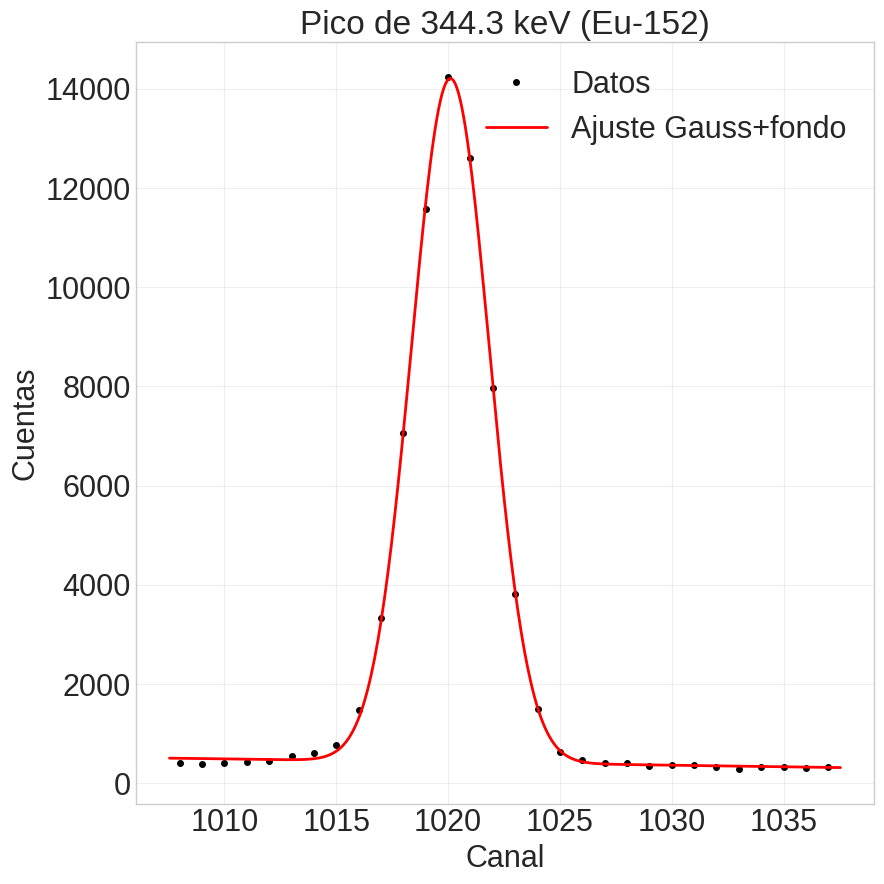

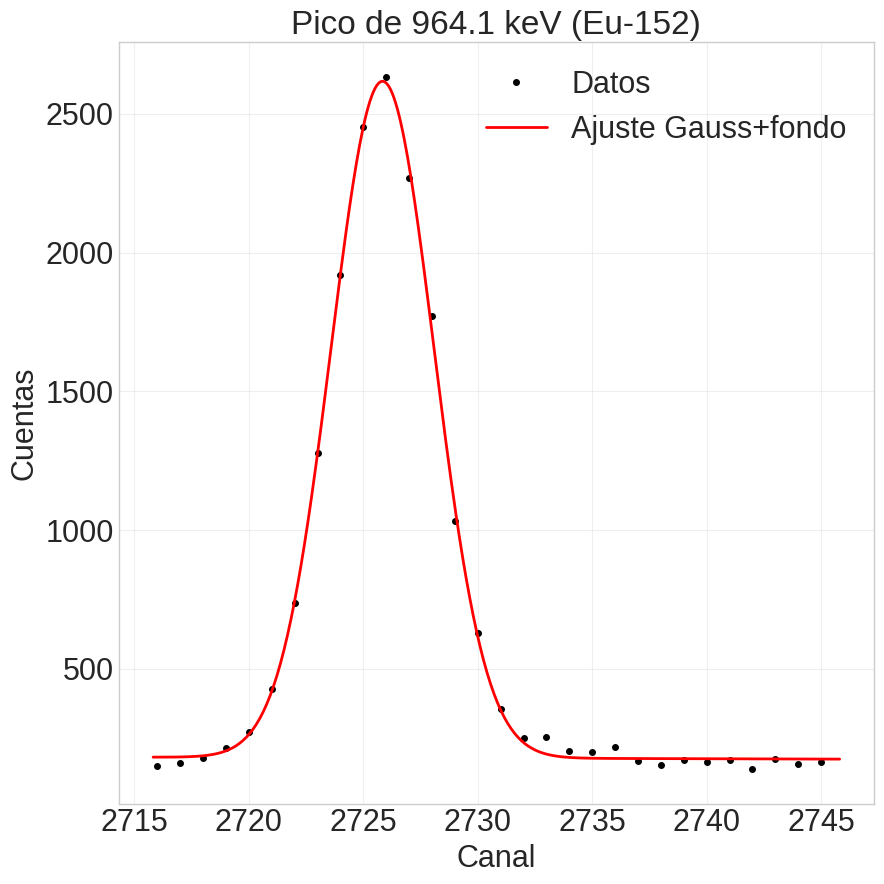

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['axes.titlesize'] = 24
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

# FUNCIONES

def leer_xy(filename):
    data = np.loadtxt(filename)
    return data[:,0], data[:,1]

def gauss_fondo(x, A, mu, sigma, m, b):
    return A*np.exp(-(x-mu)**2/(2*sigma**2)) + m*x + b

def ajustar_pico(x, y, xmin, xmax):
    mask = (x>=xmin)&(x<=xmax)
    xx = x[mask]
    yy = y[mask]

    A0 = yy.max() - yy.min()
    mu0 = xx[np.argmax(yy)]
    sigma0 = (xmax - xmin)/8
    b0 = yy.min()
    m0 = 0

    p0 = [A0, mu0, sigma0, m0, b0]

    popt, pcov = curve_fit(gauss_fondo, xx, yy, p0=p0, maxfev=5000)
    return popt, xx, yy


can_Eu, cu_Eu = leer_xy("calibracionEu-Ge8K.xy")

# parametros
a0 = -26.702
a1 =  0.362823

def canal_teorico(E):
    return (E - a0) / a1

rangos = {
    344.3: (canal_teorico(344.3) - 15, canal_teorico(344.3) + 15),
    964.1: (canal_teorico(964.1) - 15, canal_teorico(964.1) + 15)
}

# grafica primer pico
for E in [344.3]:
    xmin, xmax = rangos[E]
    popt, xx, yy = ajustar_pico(can_Eu, cu_Eu, xmin, xmax)

    A, mu, sigma, m, b = popt
    x_fit = np.linspace(xmin, xmax, 400)
    y_fit = gauss_fondo(x_fit, *popt)

    plt.figure(figsize=(9,9))
    plt.plot(xx, yy, 'k.', markersize=8, label="Datos")
    plt.plot(x_fit, y_fit, 'r', linewidth=2, label="Ajuste Gauss+fondo")

    plt.xlabel("Canal")
    plt.ylabel("Cuentas")
    plt.title(f"Pico de {E} keV (Eu-152)")
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

# grafica segundo pico
for E in [964.1]:
    xmin, xmax = rangos[E]
    popt, xx, yy = ajustar_pico(can_Eu, cu_Eu, xmin, xmax)

    A, mu, sigma, m, b = popt
    x_fit = np.linspace(xmin, xmax, 400)
    y_fit = gauss_fondo(x_fit, *popt)

    plt.figure(figsize=(9,9))
    plt.plot(xx, yy, 'k.', markersize=8, label="Datos")
    plt.plot(x_fit, y_fit, 'r', linewidth=2, label="Ajuste Gauss+fondo")

    plt.xlabel("Canal")
    plt.ylabel("Cuentas")
    plt.title(f"Pico de {E} keV (Eu-152)")
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()


#Comparación

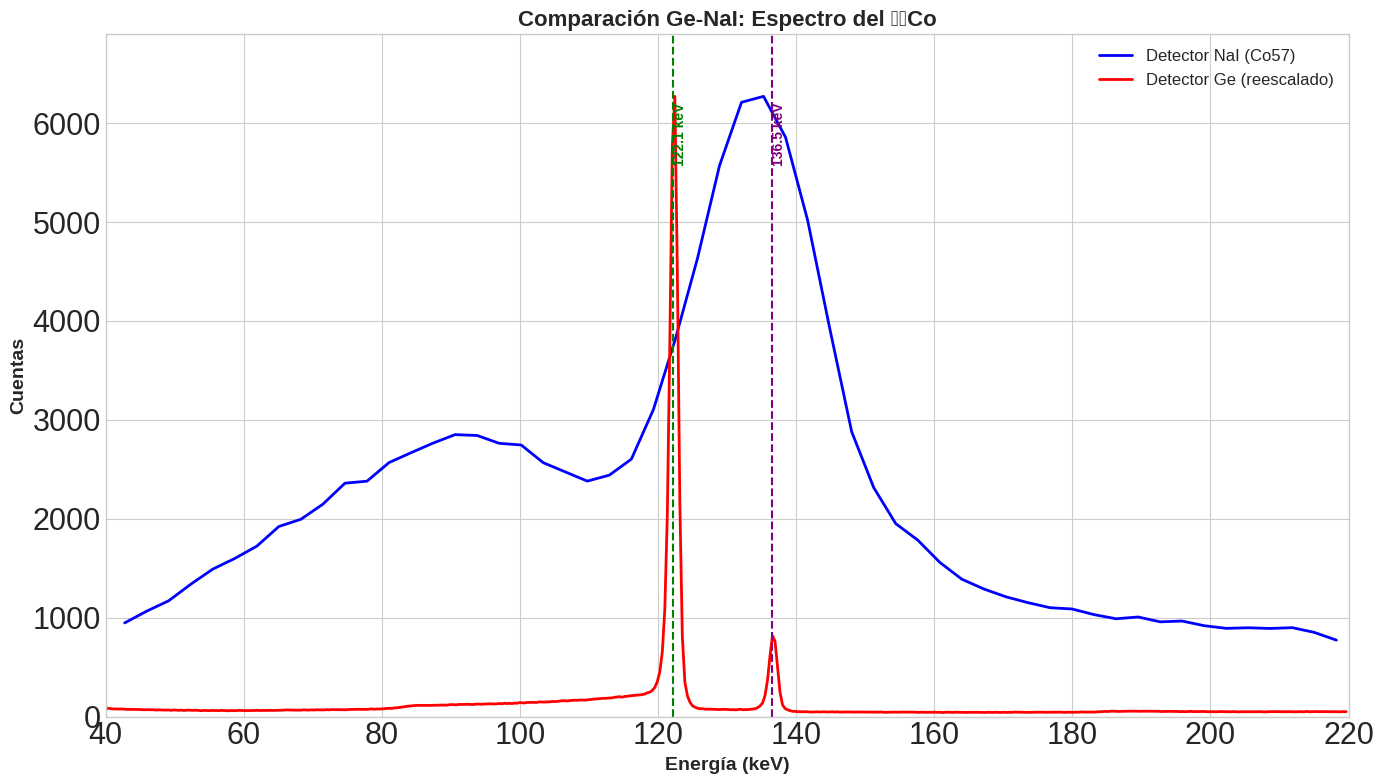

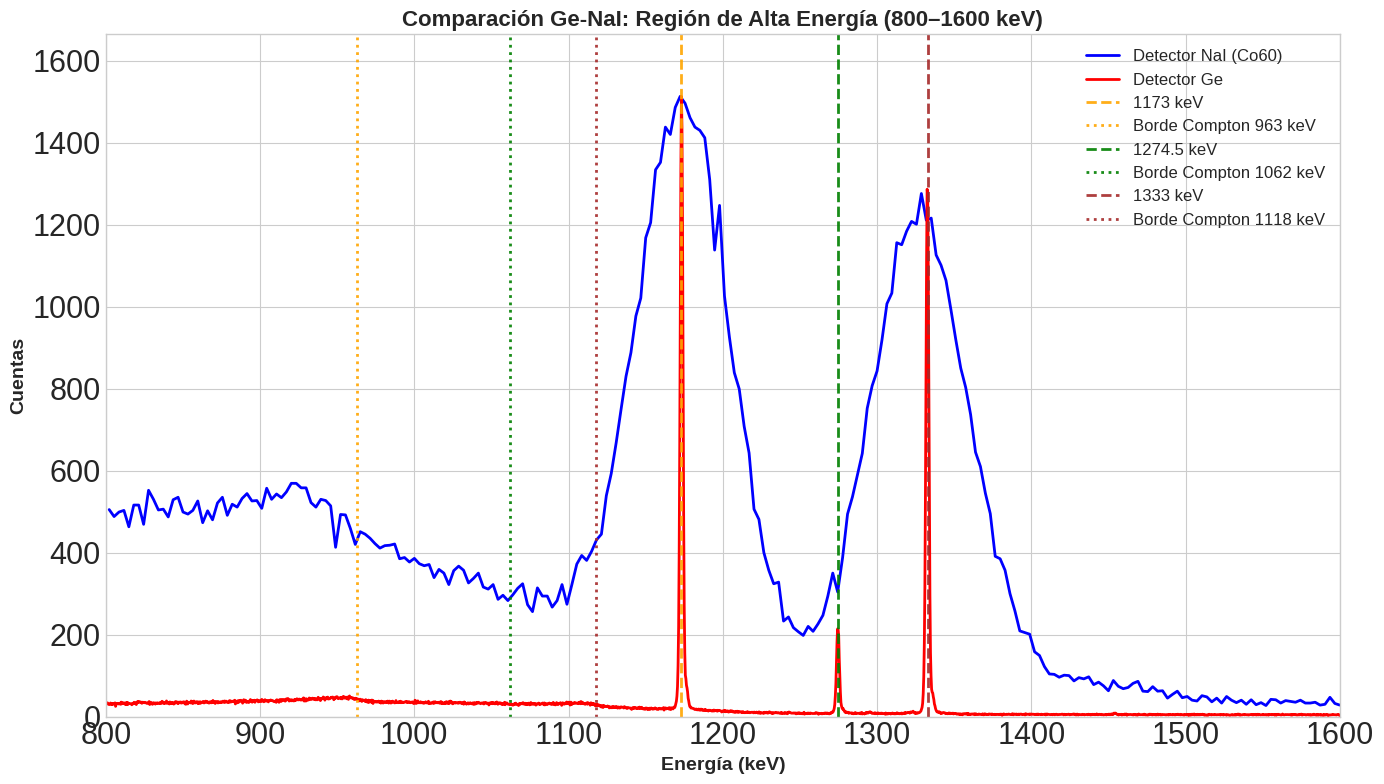

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.size'] = 12

# FUNCIONES PARA LEER DIFERENTES FORMATOS

def leer_espectro_nai(archivo):
    """Lee archivo de espectro del detector NaI en formato .dat sin prints."""
    try:
        try:
            data = pd.read_csv(archivo, delim_whitespace=True, header=None, comment='#')
        except:
            with open(archivo, 'r') as f:
                lines = f.readlines()

            data_lines = []
            for line in lines:
                if line.strip() and not line.strip().startswith('#'):
                    elements = line.split()
                    numeric_elements = []
                    for elem in elements:
                        try:
                            float(elem)
                            numeric_elements.append(elem)
                        except:
                            continue
                    if numeric_elements:
                        data_lines.append(numeric_elements)

            if data_lines:
                max_cols = max(len(line) for line in data_lines)
                for i in range(len(data_lines)):
                    data_lines[i] = data_lines[i] + ['0'] * (max_cols - len(data_lines[i]))
                data = pd.DataFrame(data_lines)
            else:
                return None, None

        for col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

        data = data.dropna(how='all')

        if data.shape[1] >= 2:
            canal = data.iloc[:, 0].values
            conteo = data.iloc[:, 1].values
        else:
            canal = np.arange(len(data))
            conteo = data.iloc[:, 0].values

        return canal, conteo

    except:
        return None, None

canal_ge, conteo_ge = np.loadtxt("calibracionNaCoCoCs-Ge8K.xy").T
canal_57co_nai, conteo_57co_nai = leer_espectro_nai("NaI_57Co_300s.dat")
canal_60co_nai, conteo_60co_nai = leer_espectro_nai("NaI_60Co_600s.dat")


# Calibración

def energia_ge(canal):
    return -26.702 + 0.362823 * canal

def energia_nai(canal):
    return -53 + 3.191 * canal

energia_ge_calib = energia_ge(canal_ge)
energia_57co_nai_calib = energia_nai(canal_57co_nai)
energia_60co_nai_calib = energia_nai(canal_60co_nai)
# Reescalado de máximos entre detectores

def reescalar_para_maximo_igual(conteo_ge, conteo_nai, energia_ge, energia_nai, energia_min, energia_max):
    mask_ge = (energia_ge >= energia_min) & (energia_ge <= energia_max)
    mask_nai = (energia_nai >= energia_min) & (energia_nai <= energia_max)

    max_ge = np.max(conteo_ge[mask_ge])
    max_nai = np.max(conteo_nai[mask_nai])

    factor_reescalado = max_nai / max_ge if max_ge > 0 else 1.0
    return conteo_ge * factor_reescalado, factor_reescalado


conteo_ge_reescalado_57co, factor_57co = reescalar_para_maximo_igual(
    conteo_ge, conteo_57co_nai, energia_ge_calib, energia_57co_nai_calib,
    40, 220
)

conteo_ge_reescalado_60co, factor_60co = reescalar_para_maximo_igual(
    conteo_ge, conteo_60co_nai, energia_ge_calib, energia_60co_nai_calib,
    800, 1600
)

# COMPARACIÓN BAJA ENERGÍA (40–220 keV)

fig, ax = plt.subplots(figsize=(14, 8))

mask_ge = (energia_ge_calib >= 40) & (energia_ge_calib <= 220)
mask_nai = (energia_57co_nai_calib >= 40) & (energia_57co_nai_calib <= 220)

ax.plot(energia_57co_nai_calib[mask_nai], conteo_57co_nai[mask_nai],
        color='blue', linewidth=2, label='Detector NaI (Co57)')

ax.plot(energia_ge_calib[mask_ge], conteo_ge_reescalado_57co[mask_ge],
        color='red', linewidth=2, label='Detector Ge (reescalado)')

ax.set_xlabel("Energía (keV)", fontsize=14, fontweight='bold')
ax.set_ylabel("Cuentas", fontsize=14, fontweight='bold')
ax.set_title("Comparación Ge-NaI: Espectro del ⁵⁷Co",
             fontsize=16, fontweight='bold')

# Líneas de los picos
ax.axvline(122.1, color='green', linestyle='--', linewidth=1.5)
ax.axvline(136.5, color='purple', linestyle='--', linewidth=1.5)

ax.text(122.1, ax.get_ylim()[1] * 0.85, '122.1 keV', rotation=90,
        fontsize=10, color='green', fontweight='bold')

ax.text(136.5, ax.get_ylim()[1] * 0.85, '136.5 keV', rotation=90,
        fontsize=10, color='purple', fontweight='bold')

ax.legend(loc='upper right', fontsize=12)
plt.xlim(40, 220)

max_nai = np.max(conteo_57co_nai[mask_nai])
ax.set_ylim(0, max_nai * 1.1)

plt.tight_layout()
plt.show()


# COMPARACIÓN ALTA ENERGÍA (800–1600 keV)
fig, ax = plt.subplots(figsize=(14, 8))

mask_ge_alta = (energia_ge_calib >= 800) & (energia_ge_calib <= 1600)
mask_nai_alta = (energia_60co_nai_calib >= 800) & (energia_60co_nai_calib <= 1600)

ax.plot(energia_60co_nai_calib[mask_nai_alta], conteo_60co_nai[mask_nai_alta],
        color='blue', linewidth=2, label='Detector NaI (Co60)')

ax.plot(energia_ge_calib[mask_ge_alta], conteo_ge_reescalado_60co[mask_ge_alta],
        color='red', linewidth=2, label='Detector Ge')


# bordes Compton calculados
E_gamma_tabla = [1173, 1274.5, 1333]
B_compton_tabla = [963, 1062, 1118]
colores = ['orange', 'green', 'brown']

for E, C, col in zip(E_gamma_tabla, B_compton_tabla, colores):

    # Línea energía gamma
    ax.axvline(E, color=col, linestyle='--', linewidth=2, alpha=0.9,
               label=f"{E} keV")

    # Línea borde Compton
    ax.axvline(C, color=col, linestyle=':', linewidth=2, alpha=0.9,
               label=f"Borde Compton {C} keV")


ax.set_xlabel("Energía (keV)", fontsize=14, fontweight='bold')
ax.set_ylabel("Cuentas", fontsize=14, fontweight='bold')
ax.set_title("Comparación Ge-NaI: Región de Alta Energía (800–1600 keV)",
             fontsize=16, fontweight='bold')

ax.legend(loc='upper right', fontsize=12)
plt.xlim(800, 1600)

max_nai_alta = np.max(conteo_60co_nai[mask_nai_alta])
ax.set_ylim(0, max_nai_alta * 1.1)

plt.tight_layout()
plt.show()
